---

_You are currently looking at **version 0.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the Jupyter Notebook FAQ course resource._

---

In [1]:
import numpy as np
import pandas as pd

### Question 1
Import the data from `assets/fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [7]:
def answer_one():
    # YOUR CODE HERE
    df = pd.read_csv('assets/fraud_data.csv')
    fraud = df[df['Class']==1]
    return len(fraud)/len(df)

answer_one()

0.016410823768035772

In [8]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('assets/fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [10]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score, accuracy_score

    # YOUR CODE HERE
    dc = DummyClassifier(strategy="most_frequent")
    dc.fit(X_train, y_train)
    y_pred = dc.predict(X_test)
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy, recall

answer_two()

(0.9852507374631269, 0.0)

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [12]:
def answer_three():
    from sklearn.metrics import recall_score, precision_score, accuracy_score
    from sklearn.svm import SVC
    
    # YOUR CODE HERE
    svc = SVC()
    svc.fit(X_train, y_train)
    
    y_pred = svc.predict(X_test)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy, recall, precision

answer_three()

(0.9900442477876106, 0.35, 0.9333333333333333)

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [86]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC
    
    # YOUR CODE HERE
    svc = SVC(C = 1e9, gamma = 1e-07)
    svc.fit(X_train, y_train)
    scores = svc.decision_function(X_test)
    predictions = (scores >= -220).astype(int)
    #The desion function tells us on which side of the hyperplane generated by the classifier we are (and how far we are away from it)
    
    cm = confusion_matrix(y_test, predictions)
    return cm

answer_four()

array([[5320,   24],
       [  14,   66]])

### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

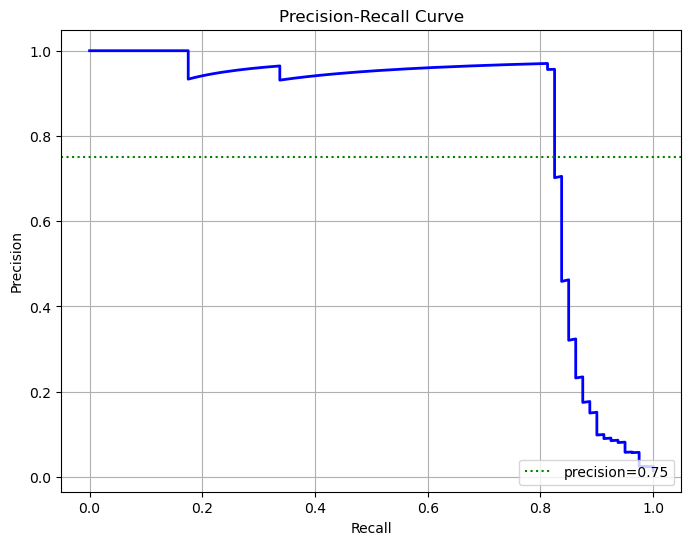

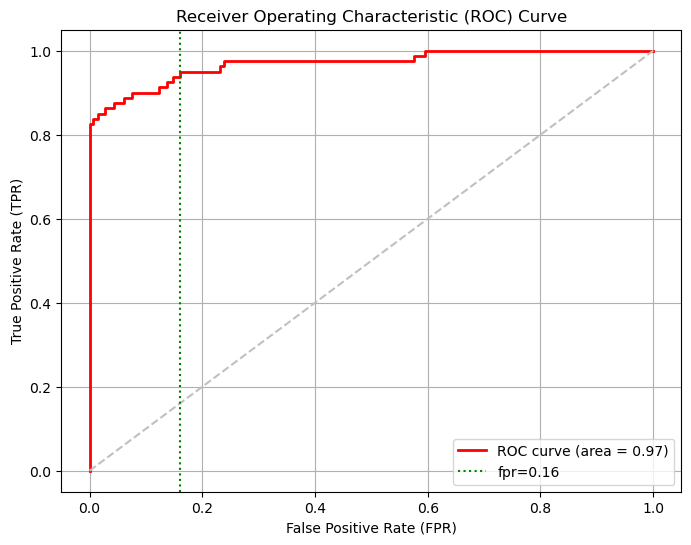

(0.825, 0.95)

In [93]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_curve, auc
import numpy as np

# YOUR CODE HERE
def answer_five():
    model = LogisticRegression(solver='liblinear')
    model.fit(X_train, y_train)
    #Interested in obtaining the probability estimates for the positive class (fraud)
    #rather than the actual class predictions.
    
    y_pred = model.predict_proba(X_test)[:,1] #For class 1 (Fraud)
    
    precision, recall, _ = precision_recall_curve(y_test, y_pred)
    recall_at_target = np.interp(0.75, precision, recall)
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='b', lw=2)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.axhline(y=0.75, color='green', linestyle=':', label='precision=0.75')
    plt.grid(True)
    plt.legend(loc='lower right')
    plt.show()
    
    
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    tpr_at_target = np.interp(0.16, fpr, tpr)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='r', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='silver', linestyle='--')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.axvline(x=0.16, color='green', linestyle=':', label='fpr=0.16')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

    return recall_at_target, tpr_at_target
    

answer_five()

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation. (Suggest to use `solver='liblinear'`, more explanation [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html))

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|

<br>

*This function should return a 4 by 2 numpy array with 8 floats.* 

*Note: do not return a DataFrame, just the values denoted by `?` in a numpy array.*

In [ ]:
def answer_six():    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import KFold

    # YOUR CODE HERE
    params = {'penalty': ['l1', 'l2'], 'C':[0.01, 0.1, 1, 10]}
    model = LogisticRegression(solver='liblinear')
    grid_search = GridSearchCV(estimator=model, param_grid=params, scoring= 'recall', cv=KFold(n_splits=3))
    
    grid_search.fit(X_train, y_train)
    
    results = grid_search.cv_results_
    #results = pd.DataFrame(results['params'])
    #results = results['mean_test_score']
    
#     df = pd.DataFrame(results)
#     df = df.pivot(index='C', columns='penalty', values='C').reset_index(drop=True)
    
    
    return results['mean_test_score'].reshape(4,2)

answer_six()

array([[0.67652656, 0.75887434],
       [0.80691312, 0.80635856],
       [0.80998174, 0.80998174],
       [0.80942718, 0.81279418]])

In [83]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    %matplotlib inline
    import seaborn as sns
    import matplotlib.pyplot as plt
    print(scores.shape)
    plt.figure()
    sns.heatmap(scores, xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10])
    plt.yticks(rotation=0);

#GridSearch_Heatmap(a)